### Problem Statement
This machine learning study aims to build a predictive model to identify credit card clients who can default or who cannot default.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install --upgrade scikit-learn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_excel('default of credit card clients.xls')

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 24)

In [6]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values

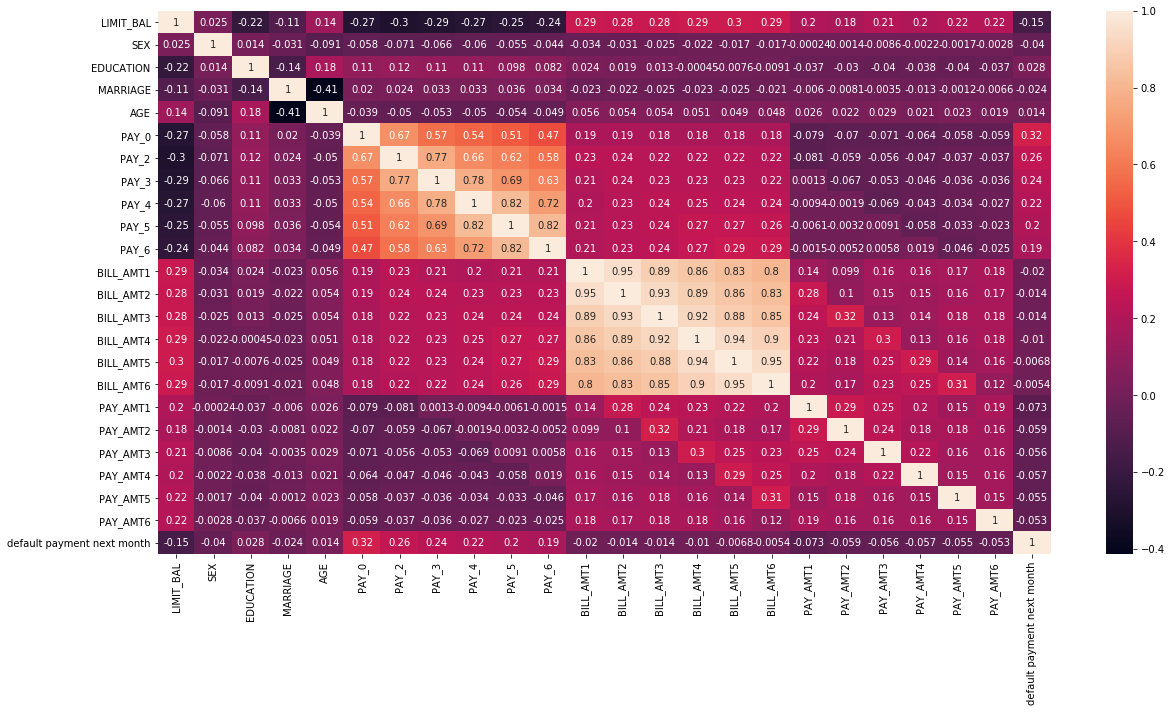

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

From the correlation heatmap above we can see that there is some high correlation between features such as pay_amt and Bill_amt.

But in this case correlation could be because after one payment was missed, so the other subsequent payments were also missed.

Same goes for Bill_amt which keeps on accumulating if the previous payments were not made, hence high dependence on previous bill amounts.

In this scenario dropping features would lead to loss of information, so I am not dropping these features. 

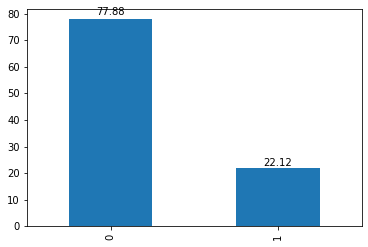

In [23]:
ax = ((df['default payment next month'].value_counts(normalize = True) * 100).round(2)).plot.bar()
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show()

The data is highly imbalanced with only 22% fraud cases and 78% not fraud cases

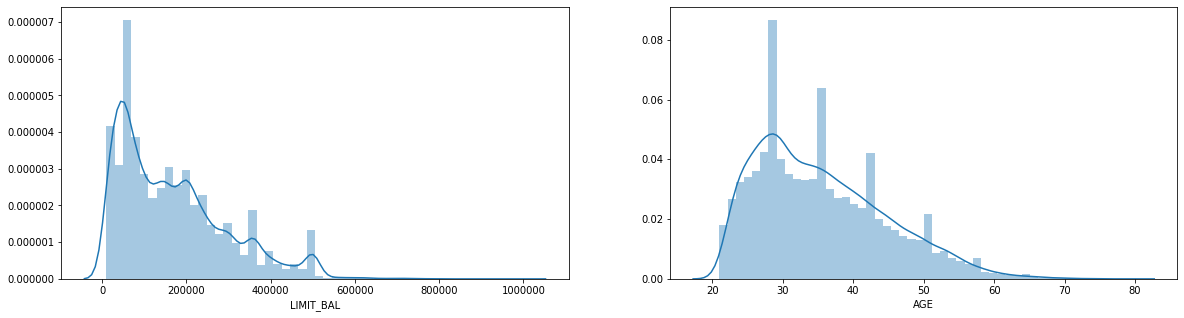

In [30]:
plt.figure(figsize = (20,5))
plt.subplot(121)
sns.distplot(df['LIMIT_BAL'])
plt.subplot(1,2,2)
sns.distplot(df['AGE'])
plt.show()

In [25]:
y = df['default payment next month']
X = df.drop(labels = ['default payment next month'], axis = 1)

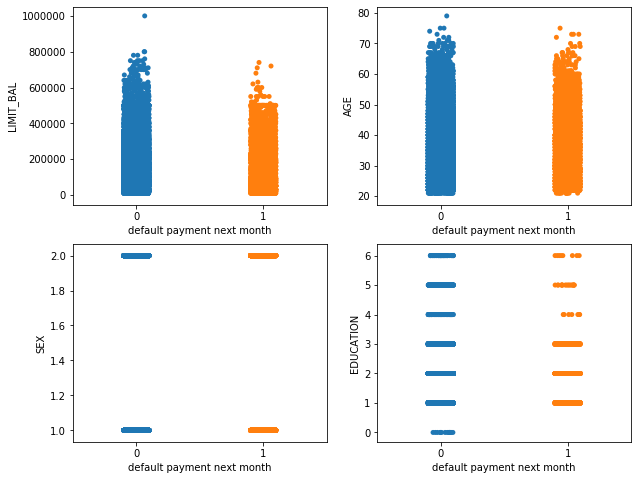

In [26]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.stripplot(y, X['LIMIT_BAL'])
plt.subplot(2,2,2)
sns.stripplot(y, X['AGE'])
plt.subplot(2,2,3)
sns.stripplot(y, X['SEX'])
plt.subplot(2,2,4)
sns.stripplot(y, X['EDUCATION'])
plt.show()

The distribution of the above features is almost same for both the classes.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [17]:
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [18]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(s_scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(s_scaler.fit_transform(X_test), columns = X_test.columns, index = X_test.index)

In [19]:
X_train.shape

(24000, 23)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
y_pred.shape

(6000,)

In [21]:
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred)))

test-set confusion matrix:
 [[4570  113]
 [1009  308]]
recall score:  0.23386484434320426
precision score:  0.7315914489311164
f1 score:  0.35443037974683544
accuracy score:  0.813
ROC AUC: 0.6048675065192426


In [22]:
# Now applying class_weight = balanced
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

In [23]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

test-set confusion matrix:
 [[3313 1370]
 [ 483  834]]
recall score:  0.6332574031890661
precision score:  0.37840290381125224
f1 score:  0.47372905424595285
accuracy score:  0.6911666666666667
ROC AUC: 0.7200389265621091


In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#!pip install pydotplus
import pydotplus

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [27]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_dt)) 
print("recall score: ", recall_score(y_test,y_pred_dt))
print("precision score: ", precision_score(y_test,y_pred_dt))
print("f1 score: ", f1_score(y_test,y_pred_dt))
print("accuracy score: ", accuracy_score(y_test,y_pred_dt))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_dt)))

test-set confusion matrix:
 [[3775  898]
 [ 803  524]]
recall score:  0.3948756593820648
precision score:  0.36849507735583686
f1 score:  0.3812295380138232
accuracy score:  0.7165
ROC AUC: 0.6013539435365278


In [38]:
dt = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [39]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_dt)) 
print("recall score: ", recall_score(y_test,y_pred_dt))
print("precision score: ", precision_score(y_test,y_pred_dt))
print("f1 score: ", f1_score(y_test,y_pred_dt))
print("accuracy score: ", accuracy_score(y_test,y_pred_dt))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_dt)))

test-set confusion matrix:
 [[3557 1116]
 [ 527  800]]
recall score:  0.6028636021100227
precision score:  0.4175365344467641
f1 score:  0.4933703361085415
accuracy score:  0.7261666666666666
ROC AUC: 0.6820224280612173


In [30]:
from xgboost import XGBClassifier

In [31]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred_xg = clf.predict(X_test)

C:\Users\ACER\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_dt)) 
print("recall score: ", recall_score(y_test,y_pred_dt))
print("precision score: ", precision_score(y_test,y_pred_dt))
print("f1 score: ", f1_score(y_test,y_pred_dt))
print("accuracy score: ", accuracy_score(y_test,y_pred_dt))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_dt)))

test-set confusion matrix:
 [[3884  789]
 [ 808  519]]
recall score:  0.3911077618688772
precision score:  0.3967889908256881
f1 score:  0.3939278937381404
accuracy score:  0.7338333333333333
ROC AUC: 0.6111327381995787


In [33]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [41]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\ACER\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [42]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1,missing = None,monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

C:\Users\ACER\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred_xgb)) 
print("recall score: ", recall_score(y_test,y_pred_xgb))
print("precision score: ", precision_score(y_test,y_pred_xgb))
print("f1 score: ", f1_score(y_test,y_pred_xgb))
print("accuracy score: ", accuracy_score(y_test,y_pred_xgb))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_xgb)))

test-set confusion matrix:
 [[4428  245]
 [ 839  488]]
recall score:  0.3677467972871138
precision score:  0.6657571623465212
f1 score:  0.4737864077669903
accuracy score:  0.8193333333333334
ROC AUC: 0.657658975360869


We got the best accuracy and f1 score for XG Boost Classifier.